In [92]:
import yfinance as yf

import pandas as pd
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')


In [93]:
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.402174,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.714725,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.716951,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.049517,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.973558,237458000


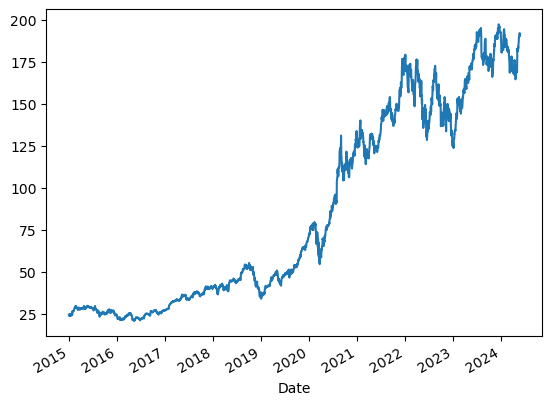

In [94]:
data['Adj Close'].plot();

In [95]:
def SMA(df, *windows):
    for window in windows:
        sma = pd.Series(
            pd.Series.
            rolling(
                df['Adj Close'], window)
                .mean(), 
                name='SMA_' + str(window)
            )
        df = df.join(sma)

    
    return df

In [96]:
sma_s = SMA(data,50,100)


In [97]:
def plot_data_SMA(df):
    plt.figure(figsize=(10,5))
    sma_periods = ', '.join([column.split('_')[-1] for column in df.columns if 'SMA' in column])
    plt.plot(df['Adj Close'], label='Adj Close')


    plt.title(f'Simple Moving Average of {ticker} {sma_periods}')

    sma_columns = [col for col in df.columns if 'SMA' in col]

    for column in sma_columns:
        plt.plot(df[column], label=column)
    plt.legend()
    plt.show()

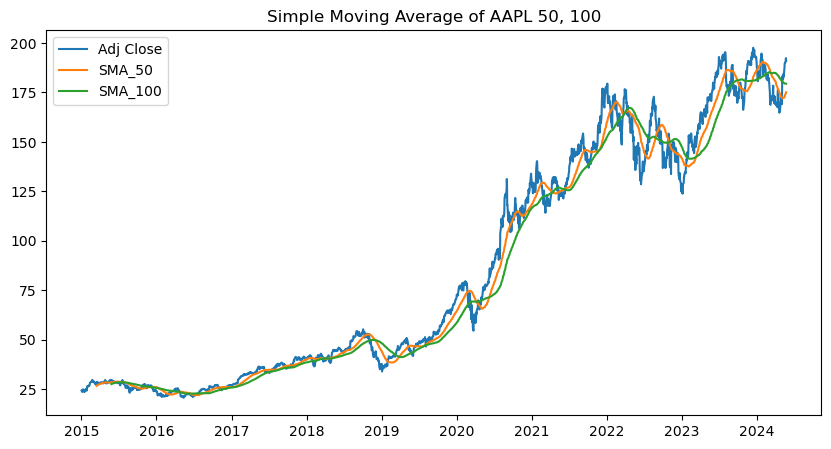

In [98]:
plot_data_SMA(sma_s)

In [99]:
def EMA(df, *windows):
    for window in windows:
        ema = pd.Series(
            pd.Series.
            ewm(
                df['Adj Close'], window)
                .mean(), 
                name='EMA_' + str(window)
            )
        df = df.join(ema)

    
    return df

In [102]:
def plot_data_EMA(df):
    plt.figure(figsize=(10,5))
    sma_periods = ', '.join([column.split('_')[-1] for column in df.columns if 'EMA' in column])
    plt.plot(df['Adj Close'], label='Price')


    plt.title(f'Simple Moving Average of {ticker} {sma_periods}')

    sma_columns = [col for col in df.columns if 'EMA' in col]

    for column in sma_columns:
        plt.plot(df[column], label=column)
    plt.legend()
    plt.show()

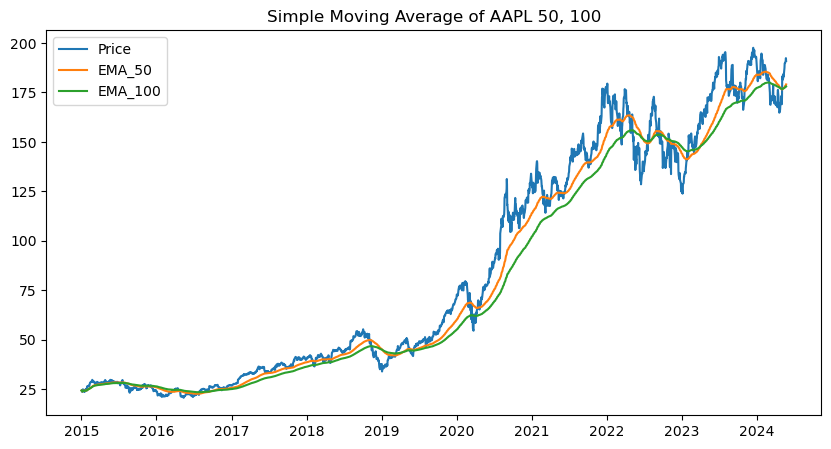

In [103]:
exponencial = plot_data_EMA(EMA(data,50,100))